### 1. Set Up

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import os
os.path.exists("/content/drive/MyDrive/8_ModelRun/data")

True

In [4]:
!wget "https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip" -P "/content/drive/MyDrive/8_ModelRun/data"

--2021-01-02 04:16:31--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.116.72
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.116.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘/content/drive/MyDrive/8_ModelRun/data/dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  17.3MB/s    in 59s     

2021-01-02 04:17:32 (18.2 MB/s) - ‘/content/drive/MyDrive/8_ModelRun/data/dogImages.zip’ saved [1132023110/1132023110]



In [5]:
!unzip "/content/drive/MyDrive/8_ModelRun/data/dogImages.zip" -d "/content/drive/MyDrive/8_ModelRun/data"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/8_ModelRun/data/dogImages/train/048.Chihuahua/Chihuahua_03417.jpg  
  inflating: /content/drive/MyDrive/8_ModelRun/data/dogImages/train/048.Chihuahua/Chihuahua_03418.jpg  
  inflating: /content/drive/MyDrive/8_ModelRun/data/dogImages/train/048.Chihuahua/Chihuahua_03421.jpg  
  inflating: /content/drive/MyDrive/8_ModelRun/data/dogImages/train/048.Chihuahua/Chihuahua_03423.jpg  
  inflating: /content/drive/MyDrive/8_ModelRun/data/dogImages/train/048.Chihuahua/Chihuahua_03424.jpg  
  inflating: /content/drive/MyDrive/8_ModelRun/data/dogImages/train/048.Chihuahua/Chihuahua_03425.jpg  
  inflating: /content/drive/MyDrive/8_ModelRun/data/dogImages/train/048.Chihuahua/Chihuahua_03426.jpg  
  inflating: /content/drive/MyDrive/8_ModelRun/data/dogImages/train/048.Chihuahua/Chihuahua_03428.jpg  
  inflating: /content/drive/MyDrive/8_ModelRun/data/dogImages/train/048.Chihuahua/Chihuahua_03429.jpg  
  inflating: 

In [6]:
!wget "https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip" -P "/content/drive/MyDrive/8_ModelRun/data"

--2021-01-02 04:22:58--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.56
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196739509 (188M) [application/zip]
Saving to: ‘/content/drive/MyDrive/8_ModelRun/data/lfw.zip’

lfw.zip             100%[===================>] 187.62M  17.9MB/s    in 13s     

2021-01-02 04:23:11 (14.9 MB/s) - ‘/content/drive/MyDrive/8_ModelRun/data/lfw.zip’ saved [196739509/196739509]



In [7]:
!unzip "/content/drive/MyDrive/8_ModelRun/data/lfw.zip" -d "/content/drive/MyDrive/8_ModelRun/data"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/8_ModelRun/data/__MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0002.jpg  
  inflating: /content/drive/MyDrive/8_ModelRun/data/lfw/Steffi_Graf/Steffi_Graf_0003.jpg  
  inflating: /content/drive/MyDrive/8_ModelRun/data/__MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0003.jpg  
  inflating: /content/drive/MyDrive/8_ModelRun/data/lfw/Steffi_Graf/Steffi_Graf_0004.jpg  
  inflating: /content/drive/MyDrive/8_ModelRun/data/__MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0004.jpg  
  inflating: /content/drive/MyDrive/8_ModelRun/data/lfw/Steffi_Graf/Steffi_Graf_0005.jpg  
  inflating: /content/drive/MyDrive/8_ModelRun/data/__MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0005.jpg  
  inflating: /content/drive/MyDrive/8_ModelRun/data/__MACOSX/lfw/._Steffi_Graf  
   creating: /content/drive/MyDrive/8_ModelRun/data/lfw/Stella_Keitel/
  inflating: /content/drive/MyDrive/8_ModelRun/data/lfw/Stella_Keitel/Stella_Keitel_0001.jpg  
   creating: /content

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from torchvision import datasets

from PIL import Image
import torchvision.transforms as transforms
from PIL import ImageFile

import torch

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import torchvision.models as models
import torch.nn as nn

In [16]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

#### Parameters

In [25]:
use_cuda = True
n_dog_classes = 133
n_epochs = 25

### 2. Create Data Loaders for the Dog Dataset

In [18]:
transform_pipeline = transforms.Compose([transforms.RandomResizedCrop(224),
                                         transforms.ToTensor()])

def get_loader(dataset, pipeline=transform_pipeline,
               batch_size=10, num_workers=0):
    """
    This function returns a dataloader for CNN.
    It will also applied a transform pipeline, in this case:
    (1) I scaled and cropped the images to 224 using RandomResizedCrop.
    (2) I then converted the images to tensor, so they can be fed into the neural network.
    """
    df = datasets.ImageFolder('../data/dogImages/{}'.format(dataset), transform=pipeline)
    loader = torch.utils.data.DataLoader(df,
                                         batch_size=batch_size, num_workers=num_workers,
                                         shuffle=True)
    return loader

train_loader = get_loader('train')
validation_loader = get_loader('valid')
test_loader = get_loader('test')

loaders_scratch = {
    'train': train_loader,
    'valid': validation_loader,
    'test': test_loader
}

In [19]:
loaders_scratch

{'test': <torch.utils.data.dataloader.DataLoader at 0x7fc990326f60>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7fc9903c2780>,
 'valid': <torch.utils.data.dataloader.DataLoader at 0x7fc990326e48>}

### 2. Design Model Architecture

In [20]:
## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False

n_inputs = model_transfer.fc.in_features
model_transfer.fc = nn.Linear(n_inputs, n_dog_classes, bias=True)

fc_parameters = model_transfer.fc.parameters()

for param in fc_parameters:
    param.requires_grad = True

if use_cuda:
    model_transfer = model_transfer.cuda()

### 3. Specify Loss Function and Optimizer

In [21]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.001)

### 4. Train and Validate the Model

In [22]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # Initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # Initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            
            # Move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            optimizer.zero_grad()
            
            # Forward pass:
            output = model(data)
            
            # Calculate Loss
            loss = criterion(output, target)
            
            # Back propagation
            loss.backward()
            
            # Perform optimization step
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            
            # Move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            ## Update validation loss:
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, 
                                                                                            valid_loss))
            valid_loss_min = valid_loss
            
    return model

In [23]:
print(use_cuda)

True


In [26]:
# train the model
model_transfer = train(n_epochs, loaders_scratch, model_transfer, optimizer_transfer, criterion_transfer,
                       use_cuda, '../model/model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('../model/model_transfer.pt'))

Epoch: 1 	Training Loss: 2.029161 	Validation Loss: 1.629812
Validation loss decreased (inf --> 1.629812).  Saving model ...
Epoch: 2 	Training Loss: 1.963676 	Validation Loss: 1.577852
Validation loss decreased (1.629812 --> 1.577852).  Saving model ...
Epoch: 3 	Training Loss: 1.927172 	Validation Loss: 1.510302
Validation loss decreased (1.577852 --> 1.510302).  Saving model ...
Epoch: 4 	Training Loss: 1.867460 	Validation Loss: 1.534465
Epoch: 5 	Training Loss: 1.833282 	Validation Loss: 1.484107
Validation loss decreased (1.510302 --> 1.484107).  Saving model ...
Epoch: 6 	Training Loss: 1.816961 	Validation Loss: 1.452422
Validation loss decreased (1.484107 --> 1.452422).  Saving model ...
Epoch: 7 	Training Loss: 1.748424 	Validation Loss: 1.389296
Validation loss decreased (1.452422 --> 1.389296).  Saving model ...
Epoch: 8 	Training Loss: 1.735703 	Validation Loss: 1.385929
Validation loss decreased (1.389296 --> 1.385929).  Saving model ...
Epoch: 9 	Training Loss: 1.666677 

<All keys matched successfully>

### 5. Test the Model

In [28]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [30]:
test(loaders_scratch, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.134922


Test Accuracy: 74% (619/836)


### 6. Predict Dog Breed with the Model

In [33]:
data_transfer = loaders_scratch.copy()

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path,
                           model=model_transfer, pipeline=transform_pipeline,
                           class_names=class_names):
    
    # Step 1: Load the image
    img = transform_pipeline(Image.open(img_path).convert('RGB'))[:3,:,:].unsqueeze(0)
    
    # Step 2: Evaluate the model on the image path
    if use_cuda:
        model = model.cuda()
        img = img.cuda()
    
    model.eval()
    index = torch.argmax(model(img))
    
    return class_names[index]

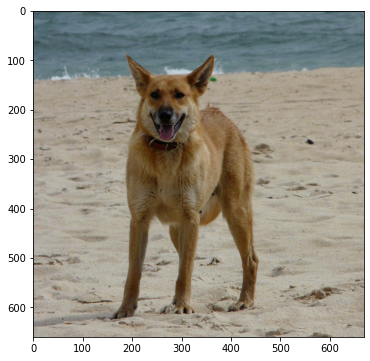

Prediction is Finnish spitz




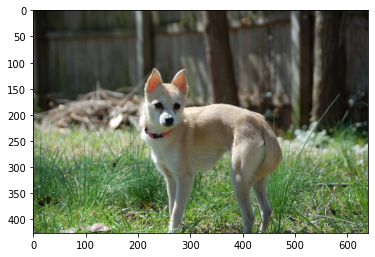

Prediction is Norwegian lundehund




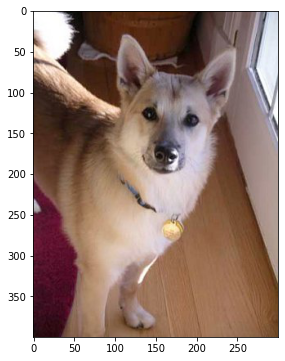

Prediction is Icelandic sheepdog




In [34]:
test_file = '108.Norwegian_buhund'

for img_file in os.listdir('../data/dogImages/test/{}'.format(test_file)):
    img_path = os.path.join('../data/dogImages/test/{}'.format(test_file), img_file)
    predition = predict_breed_transfer(img_path)
    print('===================================')
    plt.figure(figsize=(6,6))
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    print('Prediction is {}'.format(predition))
    print('\n')